<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Visualize Data
</div>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

## Read data

In [66]:
annual_pop_df = pd.read_csv("../data/processed/preprocess_OA.csv")

agri_employ_df = pd.read_csv("../data/processed/preprocess_OEA.csv")

rural_employ_df = pd.read_csv("../data/processed/preprocess_OER.csv")

products_df = pd.read_csv("../data/processed/preprocess_QCL.csv")

values_df = pd.read_csv("../data/processed/preprocess_QV.csv")

In [67]:
item = pd.read_csv("../data/external/item_code.csv")
element = pd.read_csv("../data/external/element_code.csv")
pop = pd.read_csv("../data/processed/preprocess_OA.csv")

In [121]:
temp = pd.read_csv("../data/raw/QCL.csv")


In [123]:
temp[temp['Item Code'] == "Millet"][temp['Element Code'] == 5510]

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_19308\74101781.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  temp[temp['Item'] == "Millet"][temp['Element Code'] == 5510]


,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
6030,QCL,Crops and livestock products,237,Viet Nam,5510,Production,79,Millet,1991,1991,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
6032,QCL,Crops and livestock products,237,Viet Nam,5510,Production,79,Millet,1992,1992,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
6034,QCL,Crops and livestock products,237,Viet Nam,5510,Production,79,Millet,1993,1993,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
6036,QCL,Crops and livestock products,237,Viet Nam,5510,Production,79,Millet,1994,1994,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
6038,QCL,Crops and livestock products,237,Viet Nam,5510,Production,79,Millet,1995,1995,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
6040,QCL,Crops and livestock products,237,Viet Nam,5510,Production,79,Millet,1996,1996,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
6042,QCL,Crops and livestock products,237,Viet Nam,5510,Production,79,Millet,1997,1997,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
6044,QCL,Crops and livestock products,237,Viet Nam,5510,Production,79,Millet,1998,1998,t,0.00,M,"Missing value (data cannot exist, not applicable)",NaN
6047,QCL,Crops and livestock products,237,Viet Nam,5510,Production,79,Millet,1999,1999,t,1800.00,E,Estimated value,NaN
6050,QCL,Crops and livestock products,237,Viet Nam,5510,Production,79,Millet,2000,2000,t,1705.64,I,Imputed value,NaN


In [69]:
pop = pop[pop['Element Code'] == 511]
pop = pop.rename(columns={"Value":"Total Population (1000 No)"})
pop = pop.drop(columns=['Note', 'Flag', "Unit", 'Item Code', 'Element Code', 'Area Code', 'Domain Code'])
pop

,Year,Total Population (1000 No)
0,1950,25109.200
5,1951,25627.533
10,1952,26189.593
15,1953,26820.851
20,1954,27507.453
...,...,...
640,2096,92769.682
643,2097,92339.695
646,2098,91907.988
649,2099,91473.455


In [70]:
products_df = products_df.merge(item, how= 'left', on= 'Item Code')
products_df = products_df.merge(pop, how= 'left', on= 'Year')
products_df = products_df.merge(element, how= 'left', on= 'Element Code')
products_df

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Item,Total Population (1000 No),Element
0,QCL,237,5312,711,1961,ha,1000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",33621.982,Area harvested (ha)
1,QCL,237,5419,711,1961,100 g/ha,7000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",33621.982,Yield (100 g/ha)
2,QCL,237,5510,711,1961,t,700.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",33621.982,Production (t)
3,QCL,237,5312,711,1962,ha,1000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",34533.889,Area harvested (ha)
4,QCL,237,5419,711,1962,100 g/ha,7000.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",34533.889,Yield (100 g/ha)
...,...,...,...,...,...,...,...,...,...,...,...,...
15065,QCL,237,5419,1735,2020,100 g/ha,170584.00,E,NaN,Vegetables Primary,96648.685,Yield (100 g/ha)
15066,QCL,237,5510,1735,2020,t,17006433.11,E,NaN,Vegetables Primary,96648.685,Production (t)
15067,QCL,237,5312,1735,2021,ha,1002974.00,E,NaN,Vegetables Primary,97468.029,Area harvested (ha)
15068,QCL,237,5419,1735,2021,100 g/ha,171731.00,E,NaN,Vegetables Primary,97468.029,Yield (100 g/ha)


### Correlation between cereal production and total population
-   What is cereal: https://unstats.un.org/unsd/classifications/Econ/Detail/EN/1074/011
    -   Include: Wheat, Maize (corn), Rice, Sorghum, Barley, Rye, Oats, Millet, Triticale, Fonio, Quinoa, Canary seed.

In [71]:
temp = pd.read_csv("../data/raw/QCL.csv")
temp[temp['Item'].str.contains("Maize")]

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
4565,QCL,Crops and livestock products,237,Viet Nam,5312,Area harvested,56,Maize (corn),1961,1961,ha,260200.00,A,Official figure,NaN
4566,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,56,Maize (corn),1961,1961,100 g/ha,11230.00,E,Estimated value,NaN
4567,QCL,Crops and livestock products,237,Viet Nam,5510,Production,56,Maize (corn),1961,1961,t,292200.00,A,Official figure,NaN
4568,QCL,Crops and livestock products,237,Viet Nam,5312,Area harvested,56,Maize (corn),1962,1962,ha,262020.00,X,Figure from international organizations,Unofficial figure
4569,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,56,Maize (corn),1962,1962,100 g/ha,11987.00,X,Figure from international organizations,Unofficial figure
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4743,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,56,Maize (corn),2020,2020,100 g/ha,48513.00,A,Official figure,NaN
4744,QCL,Crops and livestock products,237,Viet Nam,5510,Production,56,Maize (corn),2020,2020,t,4558107.16,A,Official figure,NaN
4745,QCL,Crops and livestock products,237,Viet Nam,5312,Area harvested,56,Maize (corn),2021,2021,ha,900673.00,A,Official figure,NaN
4746,QCL,Crops and livestock products,237,Viet Nam,5419,Yield,56,Maize (corn),2021,2021,100 g/ha,49367.00,A,Official figure,NaN


In [114]:
cereal_df = products_df[products_df['Item'].str.contains("Wheat|Rice|Maize|Sorghum|Barley|Rye|Oats|Millet|Triticale|Fonio|Quinoa|Canary seed")]
cereal_df

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Item,Total Population (1000 No),Element
4565,QCL,237,5312,56,1961,ha,260200.00,A,NaN,Maize (corn),33621.982,Area harvested (ha)
4566,QCL,237,5419,56,1961,100 g/ha,11230.00,E,NaN,Maize (corn),33621.982,Yield (100 g/ha)
4567,QCL,237,5510,56,1961,t,292200.00,A,NaN,Maize (corn),33621.982,Production (t)
4568,QCL,237,5312,56,1962,ha,262020.00,X,Unofficial figure,Maize (corn),34533.889,Area harvested (ha)
4569,QCL,237,5419,56,1962,100 g/ha,11987.00,X,Unofficial figure,Maize (corn),34533.889,Yield (100 g/ha)
...,...,...,...,...,...,...,...,...,...,...,...,...
14078,QCL,237,5419,1726,2020,100 g/ha,10043.00,E,NaN,Millet,96648.685,Yield (100 g/ha)
14079,QCL,237,5510,1726,2020,t,299259.25,E,NaN,Millet,96648.685,Production (t)
14080,QCL,237,5312,1726,2021,ha,291604.00,E,NaN,Millet,97468.029,Area harvested (ha)
14081,QCL,237,5419,1726,2021,100 g/ha,9972.00,E,NaN,Millet,97468.029,Yield (100 g/ha)


In [84]:
products_df['Element'].unique()

array(['Area harvested (ha)', 'Yield (100 g/ha)', 'Production (t)',
       'Stocks (No)', 'Prod Popultn (No)', 'Stocks (An)',
       'Producing Animals/Slaughtered (An)', 'Stocks (1000 An)',
       'Laying (1000 An)', 'Yield (100 mg/An)', 'Yield (No/An)',
       'Production (1000 No)', 'Yield/Carcass Weight (100 g/An)',
       'Yield/Carcass Weight (0.1 g/An)',
       'Producing Animals/Slaughtered (1000 An)', 'Yield (100 g)',
       'Yield (100 g/An)', 'Milk Animals (An)'], dtype=object)

In [76]:
products_df[products_df['Element'].str.contains("Production")]

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Item,Total Population (1000 No),Element
2,QCL,237,5510,711,1961,t,700.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",33621.982,Production (t)
5,QCL,237,5510,711,1962,t,700.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",34533.889,Production (t)
8,QCL,237,5510,711,1963,t,700.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",35526.727,Production (t)
11,QCL,237,5510,711,1964,t,850.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",36509.166,Production (t)
14,QCL,237,5510,711,1965,t,870.00,E,NaN,"Anise, badian, coriander, cumin, caraway, fenn...",37466.077,Production (t)
...,...,...,...,...,...,...,...,...,...,...,...,...
15057,QCL,237,5510,1735,2017,t,15723915.48,E,NaN,Vegetables Primary,94033.048,Production (t)
15060,QCL,237,5510,1735,2018,t,16266791.68,E,NaN,Vegetables Primary,94914.330,Production (t)
15063,QCL,237,5510,1735,2019,t,16674164.74,E,NaN,Vegetables Primary,95776.716,Production (t)
15066,QCL,237,5510,1735,2020,t,17006433.11,E,NaN,Vegetables Primary,96648.685,Production (t)


-   Production by ton

In [120]:
cereal_df[cereal_df['Item'] == "Maize (corn)"][cereal_df['Element Code'] == 5510]

C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_19308\257581667.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cereal_df[cereal_df['Item'] == "Maize (corn)"][cereal_df['Element Code'] == 5510]


,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Item,Total Population (1000 No),Element
4567,QCL,237,5510,56,1961,t,292200.00,A,NaN,Maize (corn),33621.982,Production (t)
4570,QCL,237,5510,56,1962,t,314085.00,X,Unofficial figure,Maize (corn),34533.889,Production (t)
4573,QCL,237,5510,56,1963,t,253840.00,X,Unofficial figure,Maize (corn),35526.727,Production (t)
4576,QCL,237,5510,56,1964,t,319600.00,X,Unofficial figure,Maize (corn),36509.166,Production (t)
4579,QCL,237,5510,56,1965,t,319100.00,A,NaN,Maize (corn),37466.077,Production (t)
...,...,...,...,...,...,...,...,...,...,...,...,...
12816,QCL,237,5510,1783,2017,t,310462.37,E,NaN,Maize (corn),94033.048,Production (t)
12819,QCL,237,5510,1783,2018,t,349442.83,E,NaN,Maize (corn),94914.330,Production (t)
12822,QCL,237,5510,1783,2019,t,409993.61,E,NaN,Maize (corn),95776.716,Production (t)
12825,QCL,237,5510,1783,2020,t,473660.25,E,NaN,Maize (corn),96648.685,Production (t)


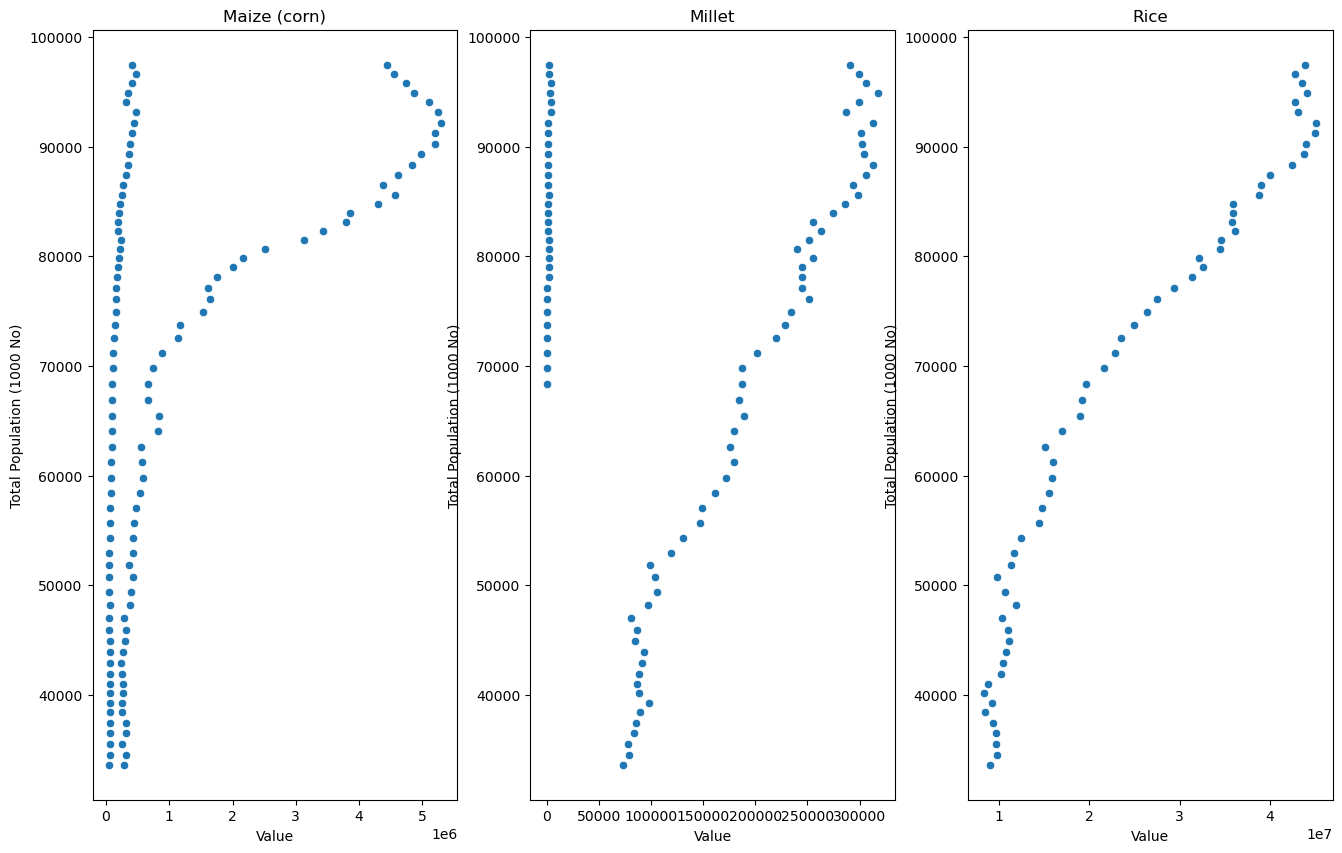

In [115]:
data = cereal_df[cereal_df['Element Code'] == 5510]
n = 0
plt.figure(figsize=(16, 10))

for item in data['Item'].unique():
    ax = plt.subplot(1, 3, n + 1)
    sn.scatterplot(data= data[data['Item'] == item], x= 'Value', y = 'Total Population (1000 No)', ax= ax, hue= )
    plt.title(f"{item}")
    n += 1

plt.show()

Text(0.5, 0, 'Production (t)')

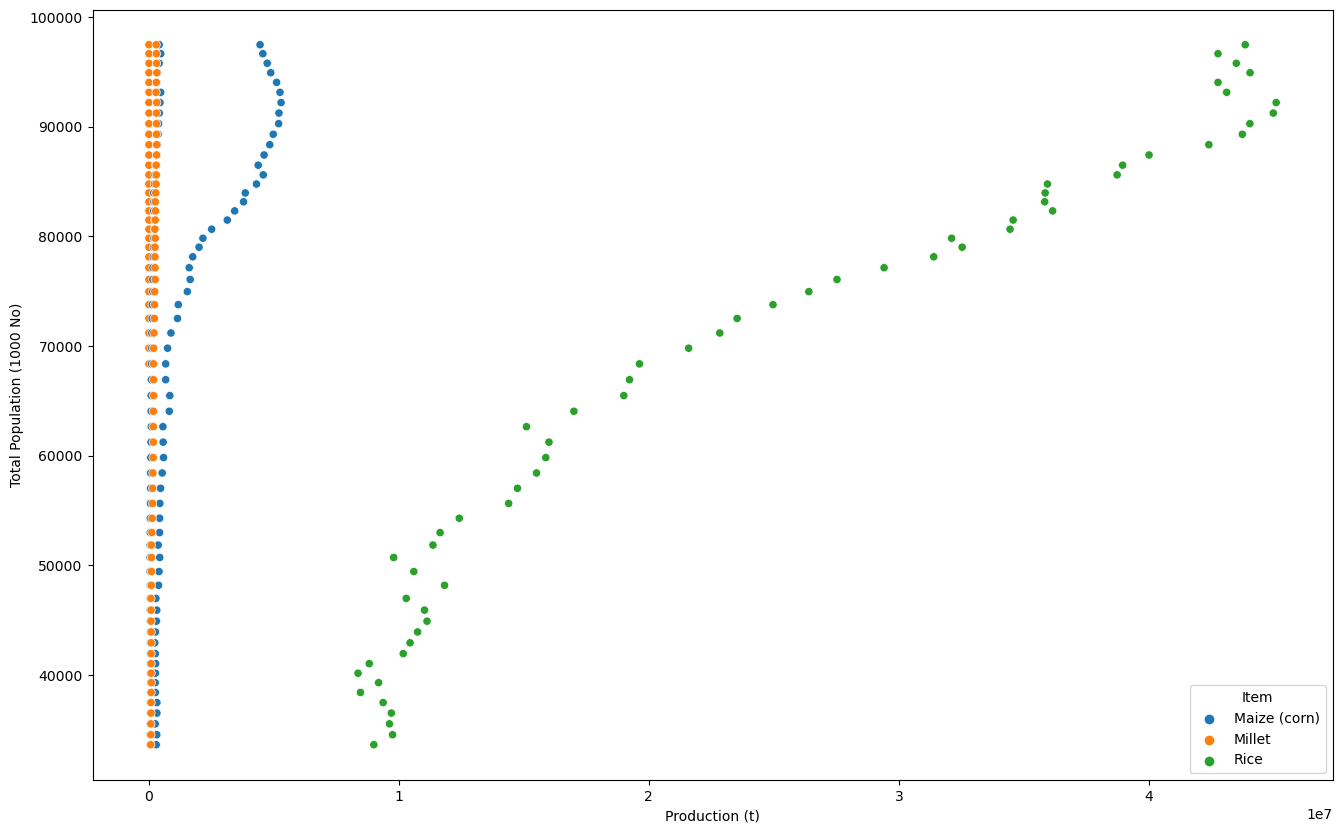

In [107]:
data = cereal_df[cereal_df['Element'] == "Production (t)"]

plt.figure(figsize=(16, 10))
sn.scatterplot(data= data, x= 'Value', y = 'Total Population (1000 No)', hue= 'Item')
plt.xlabel("Production (t)")

In [100]:
cereal_df[cereal_df['Item'] == 'Rice']

,Domain Code,Area Code,Element Code,Item Code,Year,Unit,Value,Flag,Note,Item,Total Population (1000 No),Element
9984,QCL,237,5312,27,1961,ha,4744000.00,A,NaN,Rice,33621.982,Area harvested (ha)
9985,QCL,237,5419,27,1961,100 g/ha,18966.00,E,NaN,Rice,33621.982,Yield (100 g/ha)
9986,QCL,237,5510,27,1961,t,8997400.00,A,NaN,Rice,33621.982,Production (t)
9987,QCL,237,5312,27,1962,ha,4888860.00,A,NaN,Rice,34533.889,Area harvested (ha)
9988,QCL,237,5419,27,1962,100 g/ha,19937.00,E,NaN,Rice,34533.889,Yield (100 g/ha)
...,...,...,...,...,...,...,...,...,...,...,...,...
10162,QCL,237,5419,27,2020,100 g/ha,59212.00,A,NaN,Rice,96648.685,Yield (100 g/ha)
10163,QCL,237,5510,27,2020,t,42764999.76,A,NaN,Rice,96648.685,Production (t)
10164,QCL,237,5312,27,2021,ha,7219797.00,A,NaN,Rice,97468.029,Area harvested (ha)
10165,QCL,237,5419,27,2021,100 g/ha,60740.00,A,NaN,Rice,97468.029,Yield (100 g/ha)


C:\Users\THINKPAD\AppData\Local\Temp\ipykernel_19308\1805576242.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = cereal_df[cereal_df['Element'] == "Production (t)"][cereal_df['Item'] == 'Rice']


Text(0.5, 0, 'Production (t)')

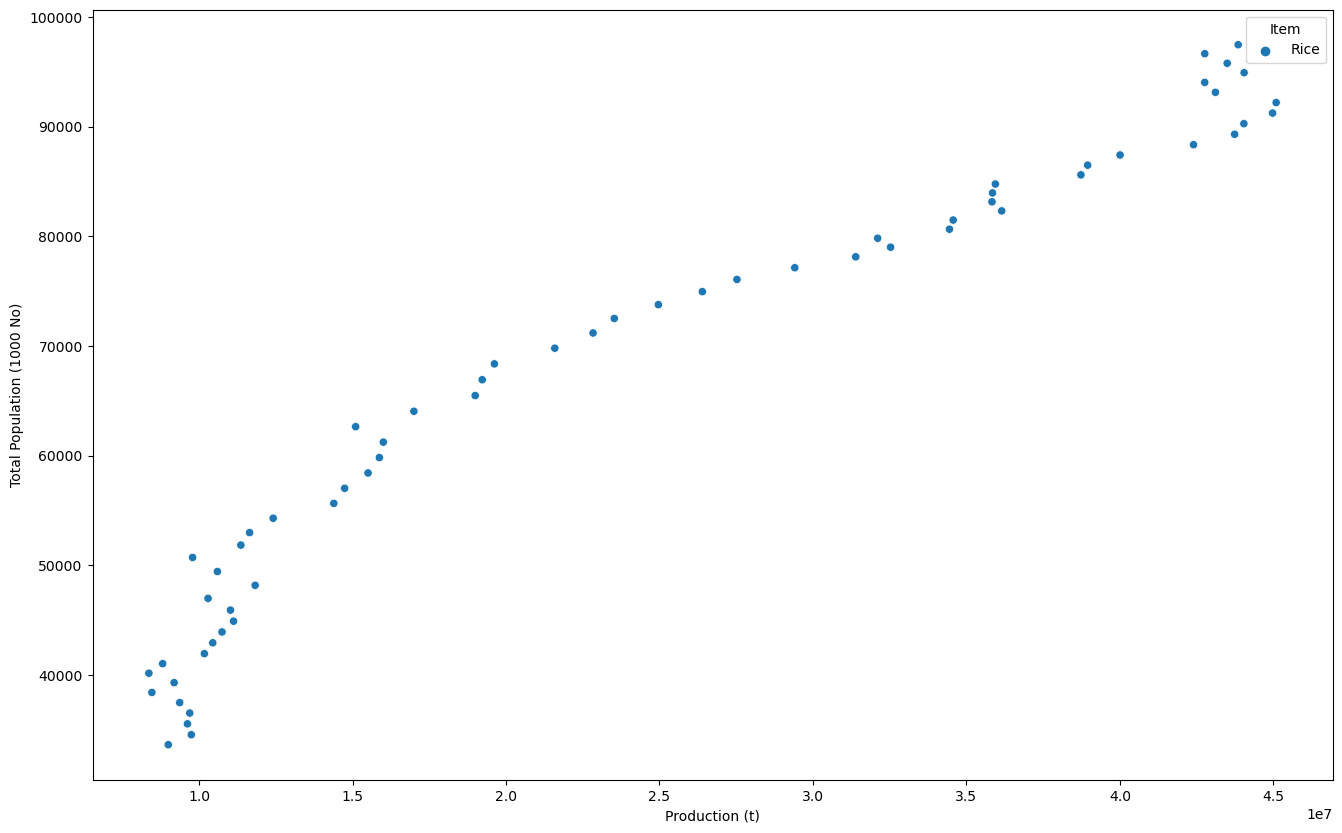

In [105]:
data = cereal_df[cereal_df['Element'] == "Production (t)"][cereal_df['Item'] == 'Rice']

plt.figure(figsize=(16, 10))
sn.scatterplot(data= data, x= 'Value', y = 'Total Population (1000 No)', hue= 'Item')
plt.xlabel("Production (t)")